# Temperature Effect on Hydrogen Bonds in Water

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Hydrogen Bond
* A hydrogen bond is the electrostatic attraction between two polar groups that occurs when a hydrogen (H) atom covalently bound to a highly electronegative atom such as nitrogen (N), oxygen (O), or fluorine (F) experiences the electrostatic field of another highly electronegative atom nearby.
* Intermolecular hydrogen bonding is responsible for the high boiling point of water (100 °C) compared to the other group 16 hydrides that have much weaker hydrogen bonds.
* O−H···:O (21 kJ/mol or 5.0 kcal/mol)

### My Hypothesis
* Macroscopic view: When temperature rises, it will give enough energy (21 kJ/mol) to break HBs, so number of HBs will decrease.
* Microscopic view: When temperature rises, the Brownian motion becomes greater and the distance between moleculars is larger, so it is more difficult to form a HB.

### Simulation Results

In [2]:
hnum300 = pd.read_csv('hbnum300.xvg',skiprows=24,delim_whitespace=True,names=['Time','HB','Pairs'])
hnum350 = pd.read_csv('hbnum350.xvg',skiprows=24,delim_whitespace=True,names=['Time','HB','Pairs'])
hnum400 = pd.read_csv('hbnum400.xvg',skiprows=24,delim_whitespace=True,names=['Time','HB','Pairs'])
print(hnum300.HB.mean())
print(hnum350.HB.mean())
print(hnum400.HB.mean())

1471.09090909
1348.18181818
1220.54545455


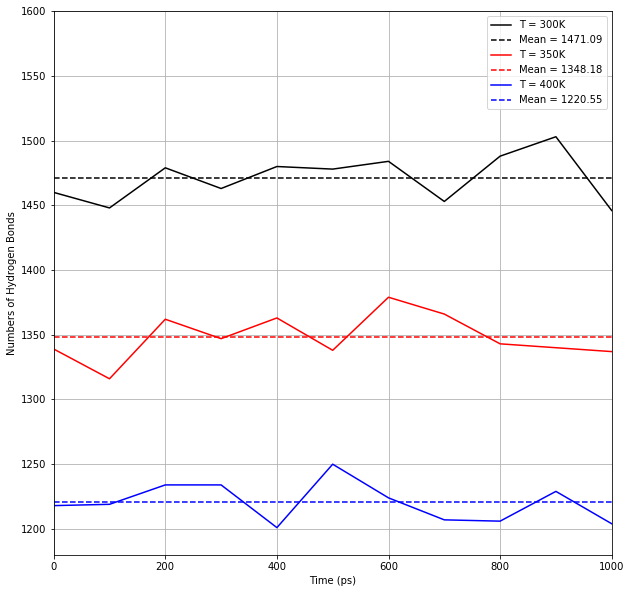

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(111)
plt.plot(hnum300.Time, hnum300.HB, label = 'T = 300K', linewidth = 1.5,color = 'k')
plt.plot([0,1000],[hnum300.HB.mean(),hnum300.HB.mean()], label = 'Mean = 1471.09', color = 'k', ls = 'dashed' )
plt.plot(hnum350.Time, hnum350.HB, label = 'T = 350K', linewidth = 1.5,color = 'r')
plt.plot([0,1000],[hnum350.HB.mean(),hnum350.HB.mean()], label = 'Mean = 1348.18', color = 'r', ls = 'dashed' )
plt.plot(hnum400.Time, hnum400.HB, label = 'T = 400K', linewidth = 1.5,color = 'b')
plt.plot([0,1000],[hnum400.HB.mean(),hnum400.HB.mean()], label = 'Mean = 1220.55', color = 'b', ls = 'dashed' )
plt.xlabel('Time (ps)')
plt.ylabel('Numbers of Hydrogen Bonds')
plt.ylim([1180,1600])
plt.xlim([0,1000])
plt.grid()
plt.legend()

In [6]:
x = np.array([300, 350, 400])
y = np.array([hnum300.HB.mean(), hnum350.HB.mean(), hnum400.HB.mean()])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)

-2.50545454545 2223.51515152


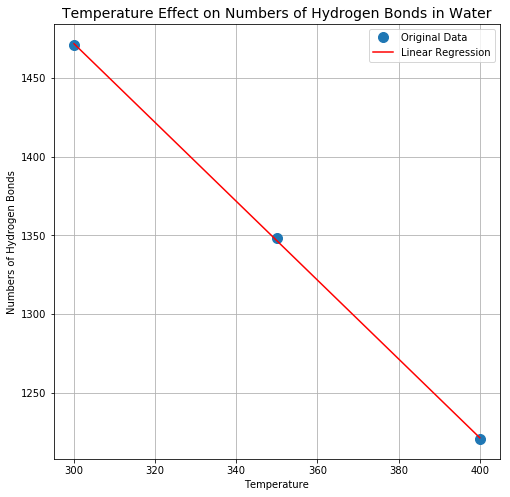

In [20]:
plt.figure(figsize=(8,8))
plt.plot(x, y, 'o', label='Original Data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Numbers of Hydrogen Bonds')
plt.title('Temperature Effect on Numbers of Hydrogen Bonds in Water',fontsize=14)
plt.legend()
plt.grid()

### Conclusion

* As shown in first figure, the number of HBs is changing all the time. That is, at the same time, some of HBs is breaking and some of them are forming, because the distance between moleculars is changing all the time  due to  Brownian motion.
* Amazingly, the regression line `y = -2.505 x + 2223` fits the data very well.

### Future Work and Improvements
* Higher temperature and get more data.
* Compare boiling point and number of HBs. 
* See different chemicals.
* Machine learning?
* Need some visualizaion, like a movie HBs are forming and breaking.